original data shape: (74682, 4)
     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
cleaned data shape: (57275, 5)
     id       entity sentiment  \
0  2401  Borderlands  positive   
1  2401  Borderlands  positive   
2  2401  Borderlands  positive   
3  2401  Borderlands  positive   
4  2401  Borderlands  positive   

                                               tweet  label  
0  im getting on borderlands and i will murder yo...    2.0  
1  i am coming to the borders and i will kill you...    2.0  
2  im getti

C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.82      0.82      0.82      4233
     neutral       0.77      0.75      0.76      3409
    positive       0.78      0.80      0.79      3813

    accuracy                           0.79     11455
   macro avg       0.79      0.79      0.79     11455
weighted avg       0.79      0.79      0.79     11455

Tweet: I love programming! #coding http://example.com
Predicted Sentiment: positive


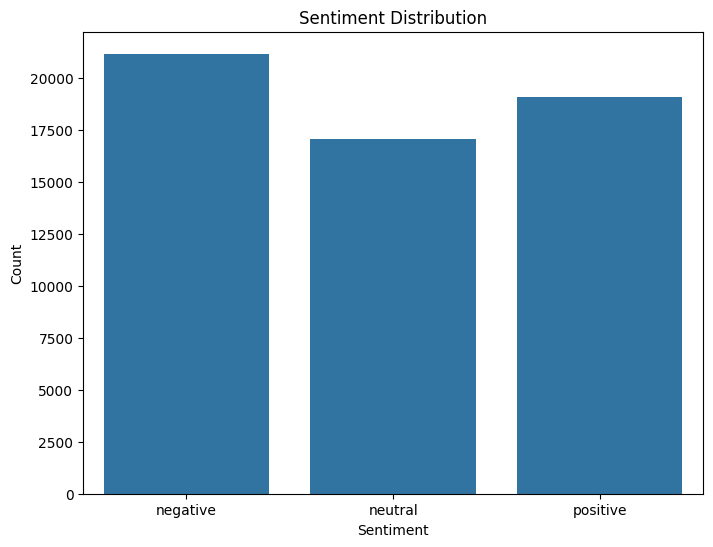

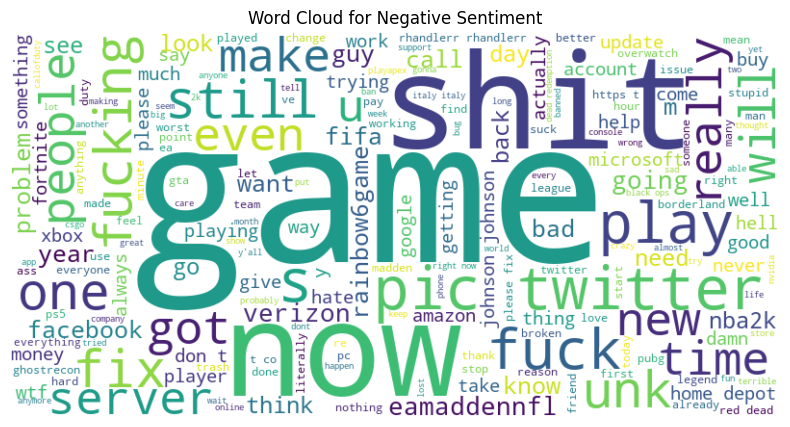

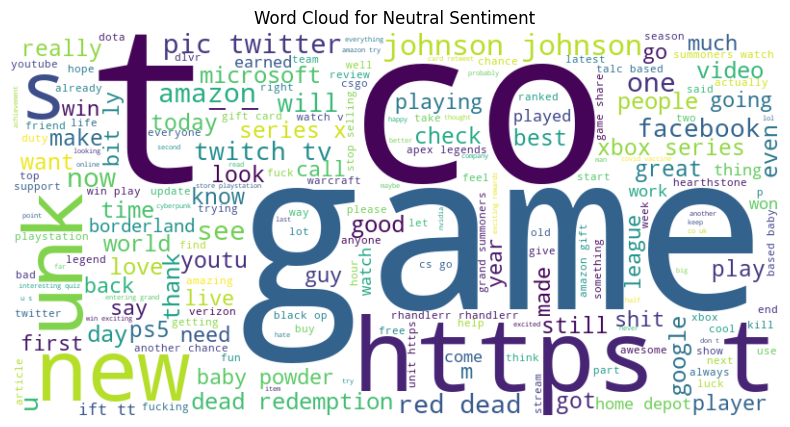

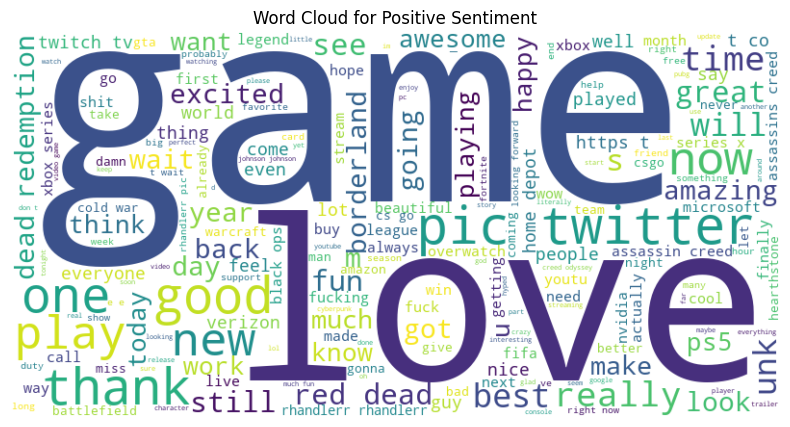

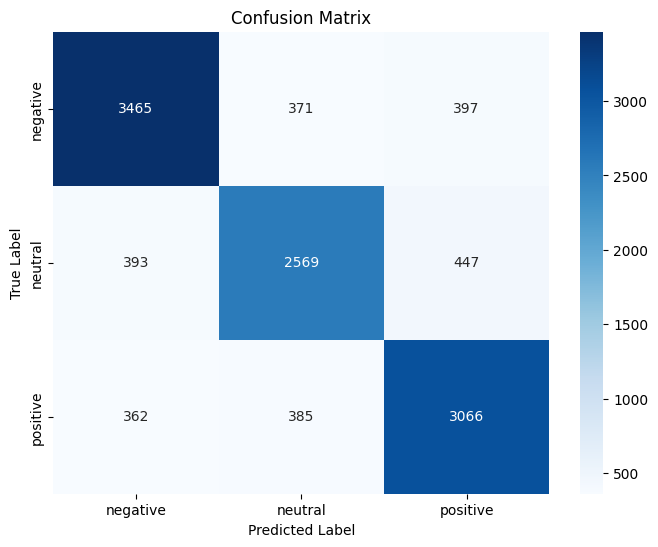


Top features for class 'negative':
glitch: 0.8253
rockstarsupport: 0.5674
transaction: 0.5368
whale: 0.5343
fix: 0.5185
bias: 0.5051
overnight: 0.4620
duos: 0.4549
verizonfios: 0.4506
external: 0.4480

Bottom features for class 'negative':
idle: -0.6709
exciting: -0.6372
towers: -0.6282
amzn: -0.5937
feed: -0.5649
bioshock: -0.5547
cloud: -0.5491
auroa: -0.5234
dp: -0.5087
cole: -0.4969


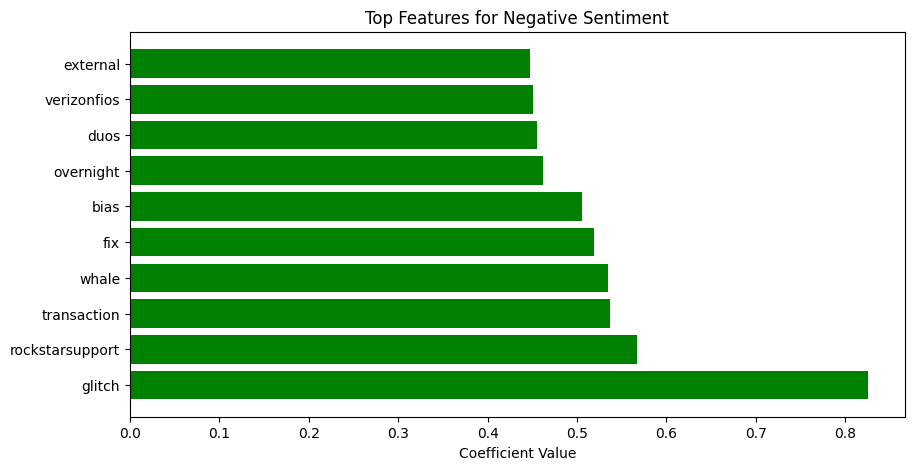


Top features for class 'neutral':
dp: 0.6045
inspiring: 0.6021
com: 0.5203
ama: 0.4842
yu: 0.4336
modernwarzone: 0.4294
stressful: 0.3963
dedicated: 0.3787
dub: 0.3772
halts: 0.3690

Bottom features for class 'neutral':
cat: -0.6854
kidding: -0.6245
productivity: -0.6212
funds: -0.6038
easportsfifa: -0.5749
commercials: -0.5706
vzwsupport: -0.5687
amp: -0.5676
hoping: -0.5291
effect: -0.5145


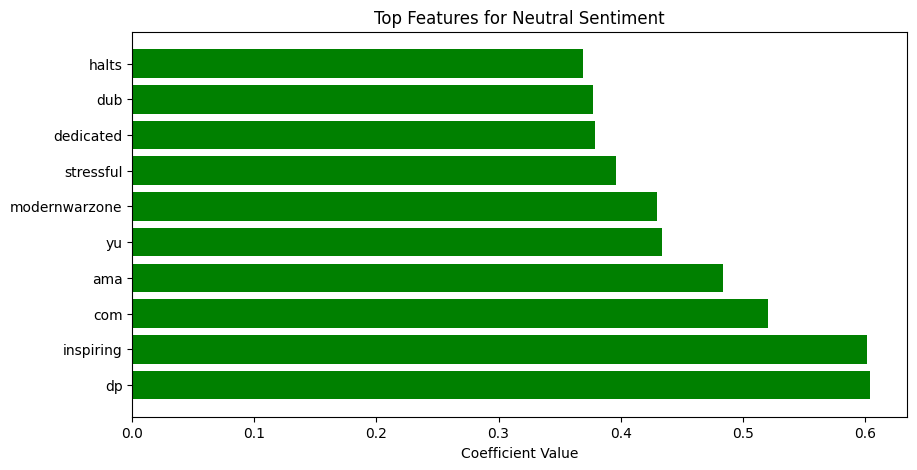


Top features for class 'positive':
idle: 0.8058
nvda: 0.5619
founded: 0.5465
funds: 0.5404
revenant: 0.5100
bioshock: 0.4837
pirate: 0.4547
nr: 0.4455
freakin: 0.4096
ubuntu: 0.4090

Bottom features for class 'positive':
glitch: -1.0618
sbmm: -0.7059
toxic: -0.7029
bot: -0.6954
dedicated: -0.6267
powder: -0.5945
inspiring: -0.5618
complain: -0.5586
bernie: -0.5545
emailed: -0.5431


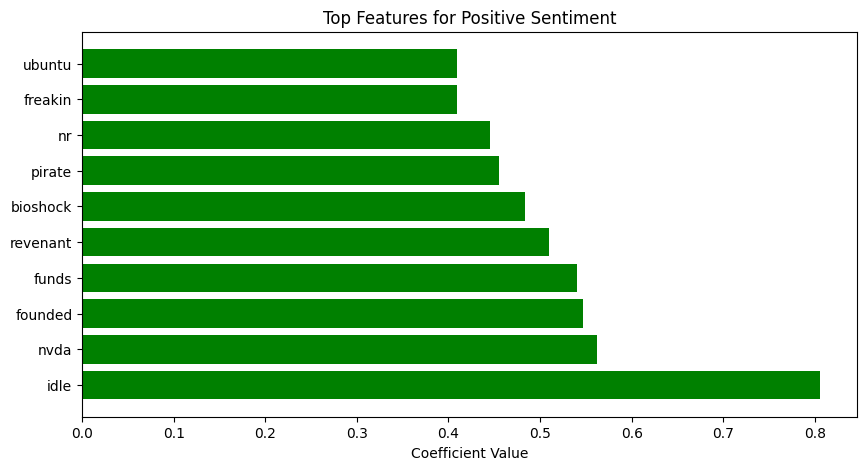

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from wordcloud import WordCloud
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ["id", "entity", "sentiment", "tweet"]
print('original data shape:', df.shape )
print(df.head())

#data cleaning
df = df.drop_duplicates(subset=['tweet'])
#Map sentiment to numerical values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df["sentiment"] = df["sentiment"].str.lower()  # Convert sentiment to lowercase
df["label"] = df["sentiment"].map(sentiment_mapping)
df = df.dropna(subset=['label'])  # Remove any rows where mapping didn't work
# text cleaning
df['tweet'] = df['tweet'].str.replace(r'http\S+|www\S+|https\S+', '', case=False)
df['tweet'] = df['tweet'].str.replace(r'@\w+', '', case=False)
df['tweet'] = df['tweet'].str.replace(r'#\w+', '', case=False)
df['tweet'] = df['tweet'].str.replace(r'[^\w\s]', '', case=False)
df['tweet'] = df['tweet'].str.lower()
df['tweet'] = df['tweet'].str.strip()
df = df[df['tweet'].str.len() > 0]
print('cleaned data shape:', df.shape )
print(df.head())    
X = df['tweet']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)
# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'], labels=[0, 1, 2]))
# Save the model and vectorizer
if not os.path.exists('model'):
    os.makedirs('model')
joblib.dump(model, 'model/logistic_regression_model.pkl')
joblib.dump(vectorizer, 'model/tfidf_vectorizer.pkl')
# Load the model and vectorizer
loaded_model = joblib.load('model/logistic_regression_model.pkl')
loaded_vectorizer = joblib.load('model/tfidf_vectorizer.pkl')
# Example prediction
def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.IGNORECASE)
    tweet = re.sub(r'@\w+', '', tweet, flags=re.IGNORECASE)
    tweet = re.sub(r'#\w+', '', tweet, flags=re.IGNORECASE)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.lower().strip()
    return tweet

example_tweet = "I love programming! #coding http://example.com"
cleaned_tweet = preprocess_tweet(example_tweet)
tweet_vector = loaded_vectorizer.transform([cleaned_tweet]).toarray()
tweet_vector_scaled = scaler.transform(tweet_vector)
predicted_label = loaded_model.predict(tweet_vector_scaled)[0]
label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_sentiment = label_mapping[predicted_label]
print(f"Tweet: {example_tweet}")
print(f"Predicted Sentiment: {predicted_sentiment}")

# 1. Data Distribution and Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, order=['negative', 'neutral', 'positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('sentiment_distribution.png')
plt.show()
# 2. Word Cloud for Each Sentiment
sentiments = ['negative', 'neutral', 'positive']
for sentiment in sentiments:
    text = ' '.join(df[df['sentiment'] == sentiment]['tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.savefig(f'wordcloud_{sentiment}.png')
    plt.show()
# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'], cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.show()  
# 4. Feature Importance (for Logistic Regression)
feature_names = loaded_vectorizer.get_feature_names_out()
coefficients = loaded_model.coef_
for i, class_label in enumerate(['negative', 'neutral', 'positive']):
    top_positive_indices = np.argsort(coefficients[i])[-10:]
    top_negative_indices = np.argsort(coefficients[i])[:10]
    top_features = [(feature_names[idx], coefficients[i][idx]) for idx in top_positive_indices]
    bottom_features = [(feature_names[idx], coefficients[i][idx]) for idx in top_negative_indices]
    print(f"\nTop features for class '{class_label}':")
    for feature, coef in reversed(top_features):
        print(f"{feature}: {coef:.4f}")
    print(f"\nBottom features for class '{class_label}':")
    for feature, coef in bottom_features:
        print(f"{feature}: {coef:.4f}")

# Save feature importance plots
    plt.figure(figsize=(10, 5))
    top_features_names, top_features_coefs = zip(*reversed(top_features))
    plt.barh(top_features_names, top_features_coefs, color='green')
    plt.title(f'Top Features for {class_label.capitalize()} Sentiment')
    plt.xlabel('Coefficient Value')
    plt.savefig(f'top_features_{class_label}.png')
    plt.show()